# ***EDA on Titanic Dataset ***

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C


In [ ]:

import warnings
from typing import Optional
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1.000000e+06,1000000.000000,1000000.00000,801400.000000,1000000.000000,1000000.000000,1000000.000000
mean,5.013095e+05,0.381681,2.31125,29.280339,0.511101,0.360037,33.461097
std,2.886753e+05,0.485799,0.83577,12.744978,1.104846,0.767296,47.976641
min,1.310000e+03,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2.513098e+05,0.000000,2.00000,21.000000,0.000000,0.000000,8.568924
50%,5.013095e+05,0.000000,3.00000,29.000000,0.000000,0.000000,15.883647
75%,7.513092e+05,1.000000,3.00000,37.000000,1.000000,0.000000,35.561000
max,1.001309e+06,1.000000,3.00000,114.000000,8.000000,6.000000,640.883614


In [ ]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age            198600
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin          770195
Embarked         2240
dtype: int64

In [ ]:
df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=0)
df['Sex']=df['Sex'].map({'female': 0, 'male': 1})
df = pd.get_dummies(data=df, columns=['Embarked'], dtype=int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,NaN,0,0,76.760165,1,0,0
1,0,3,1,29.0,0,0,10.193097,0,0,1
2,0,3,1,20.0,0,0,12.029416,1,0,0
3,0,3,1,27.0,0,0,13.429448,0,0,1
4,0,3,1,32.0,0,0,4.840769,1,0,0


In [ ]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age           198600
SibSp              0
Parch              0
Fare               0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
dtype: int64

In [ ]:
df['Age']=df["Age"].interpolate(method="quadratic").round()
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           1
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
df["Age"]=df["Age"].fillna(29)
df.isnull().sum().sum()

0

<Axes: title={'center': 'Correlation between different features of the dataset'}>

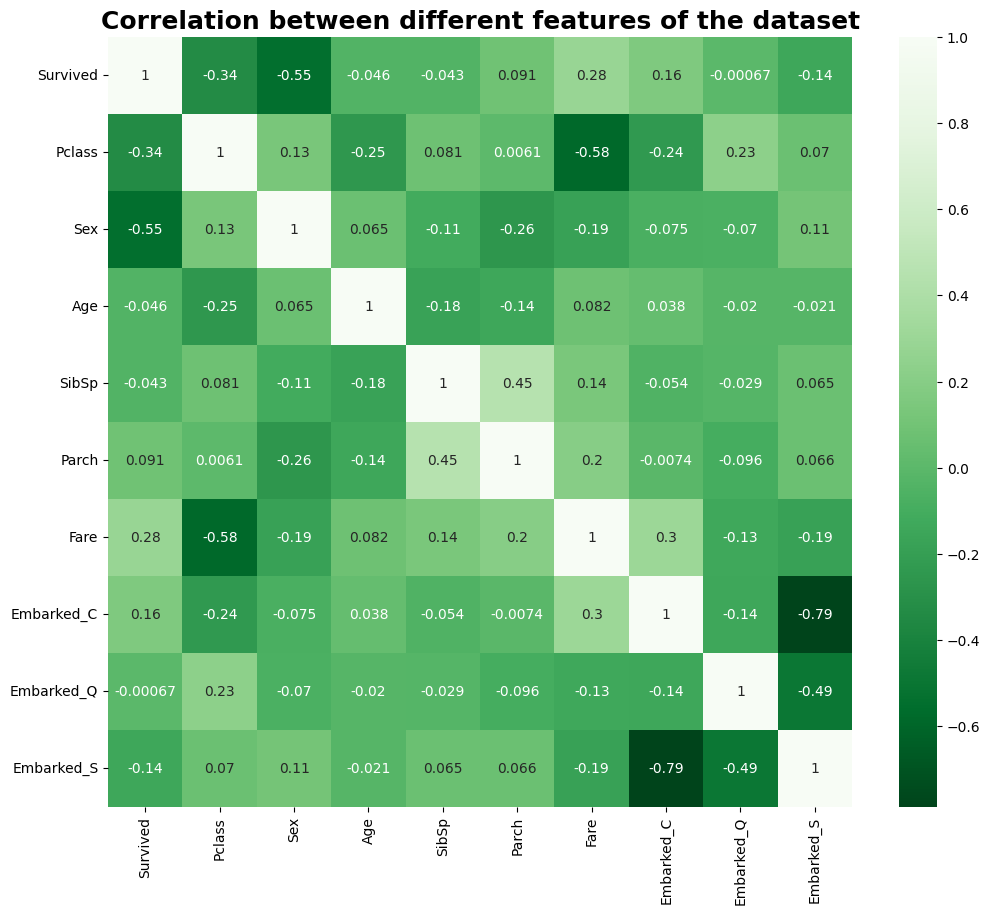

In [ ]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if(x<18):
      return "Under 18"
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['Age'].apply(age_group)

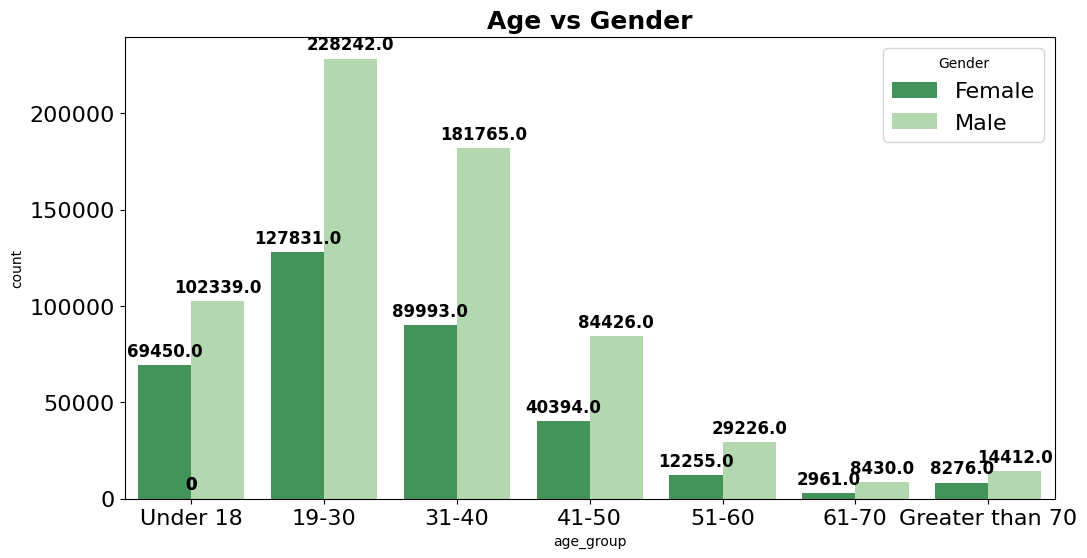

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['Under 18','19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

# Melt the dataframe to convert it to long-form
df_melted = df.melt(id_vars=['age_group'], value_vars=['Sex'])

# Now use the melted dataframe for the countplot
ax=sns.countplot(x='age_group', hue='value', data=df_melted, palette='Greens_r', order=order_list)

plt.title('Age vs Gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Gender', labels=['Female', 'Male'],fontsize=16)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

plt.show()

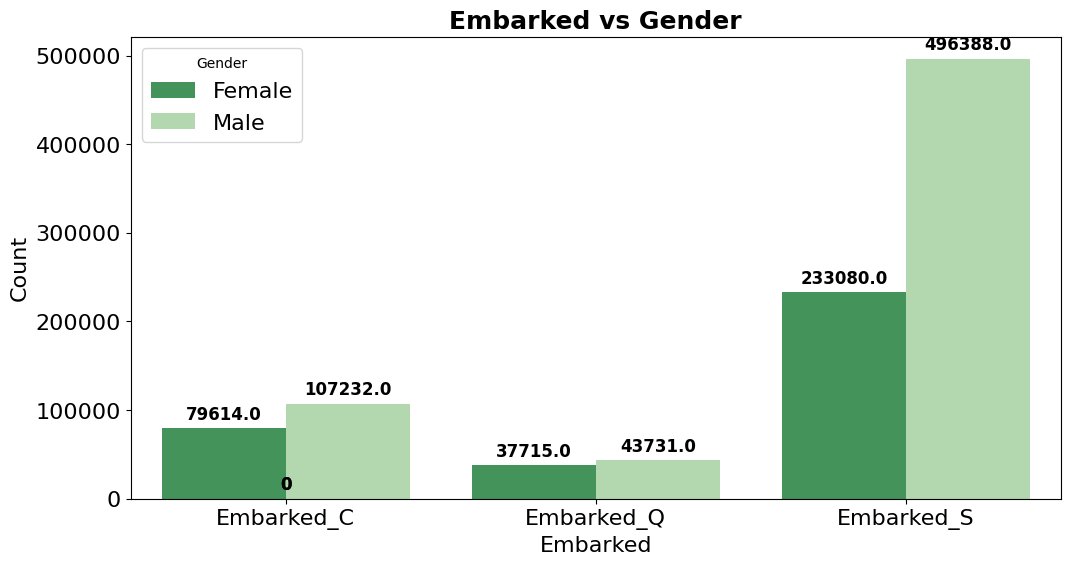

In [ ]:
# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Sex'], value_vars=['Embarked_C', 'Embarked_Q', 'Embarked_S'],
                    var_name='Embarked', value_name='Value')

# Filter the melted dataframe to include only rows where 'Value' is 1
df_filtered = df_melted[df_melted['Value'] == 1]

plt.figure(figsize=(12, 6))
ax=sns.countplot(x='Embarked', hue='Sex', data=df_filtered, palette='Greens_r')

# Update the legend labels
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=16)

plt.title('Embarked vs Gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Embarked', fontsize=16)
plt.ylabel('Count', fontsize=16)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

plt.show()

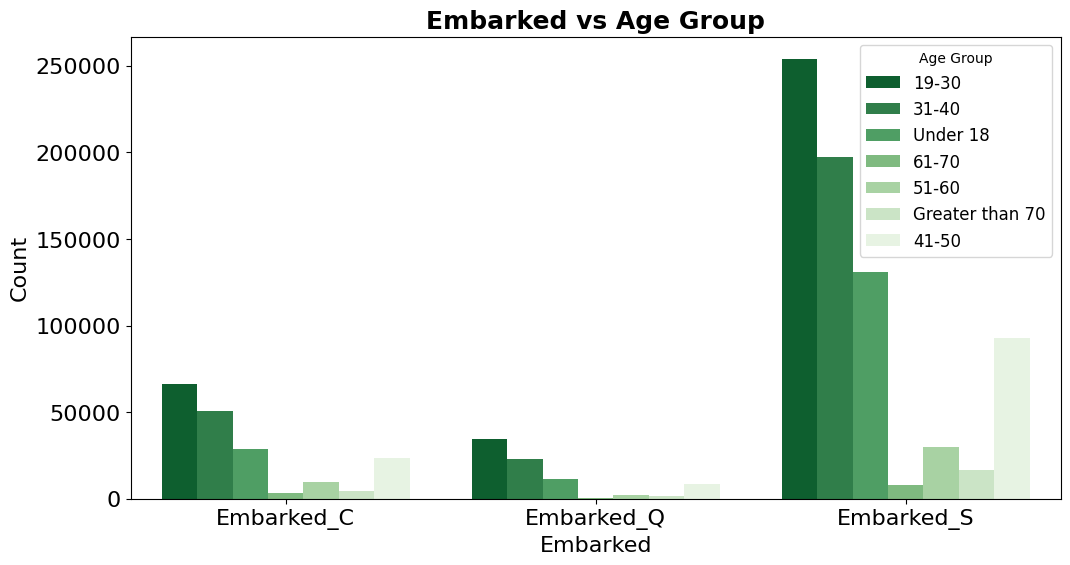

In [ ]:
df_melted = df.melt(id_vars=['age_group'], value_vars=['Embarked_C', 'Embarked_Q', 'Embarked_S'],
                    var_name='Embarked', value_name='Value')

# Filter the melted dataframe to include only rows where 'Value' is 1
df_filtered = df_melted[df_melted['Value'] == 1]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Embarked', hue='age_group', data=df_filtered, palette='Greens_r')

# Update the legend labels
ax.legend(title='Age Group', fontsize=12)

# Add title and labels with appropriate font sizes
plt.title('Embarked vs Age Group', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Embarked', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.show()

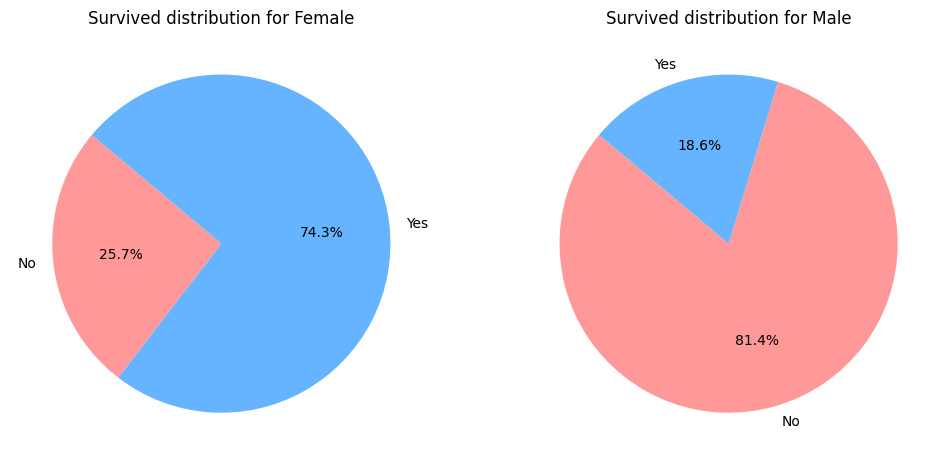

In [ ]:
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'})

# Aggregate the data
survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Plot the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, sex in enumerate(survived_counts.index):
    axes[i].pie(survived_counts.loc[sex], labels=survived_counts.columns, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
    axes[i].set_title(f'Survived distribution for {sex}')

plt.show()

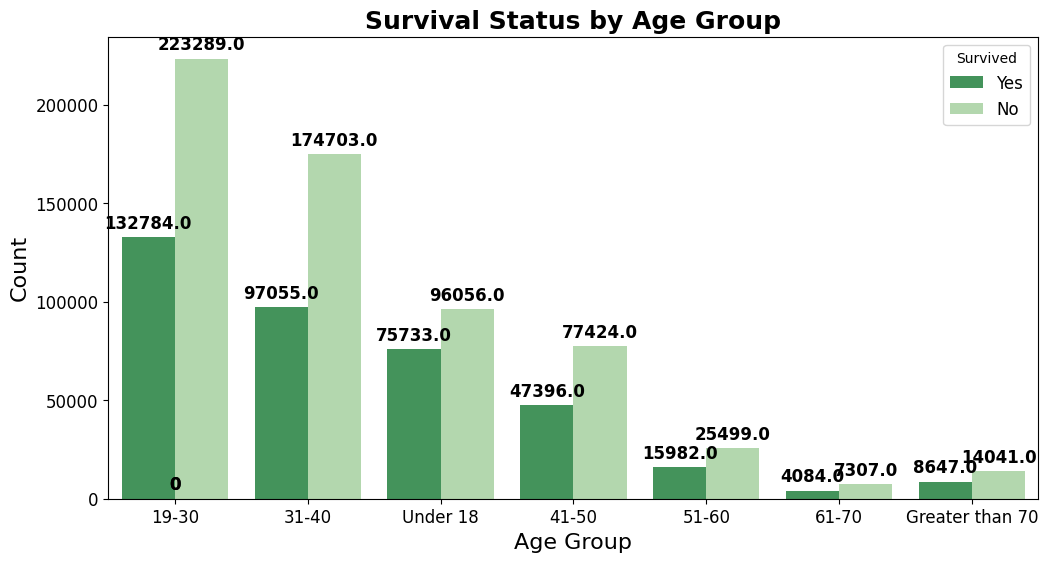

In [ ]:
survived_counts = df.groupby(['age_group', 'Survived']).size().unstack()

plt.figure(figsize=(12, 6))
ax=sns.countplot(x='age_group', hue='Survived', data=df, palette='Greens_r')

# Add title and labels with appropriate font sizes
plt.title('Survival Status by Age Group', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black', fontweight='bold')
plt.show()

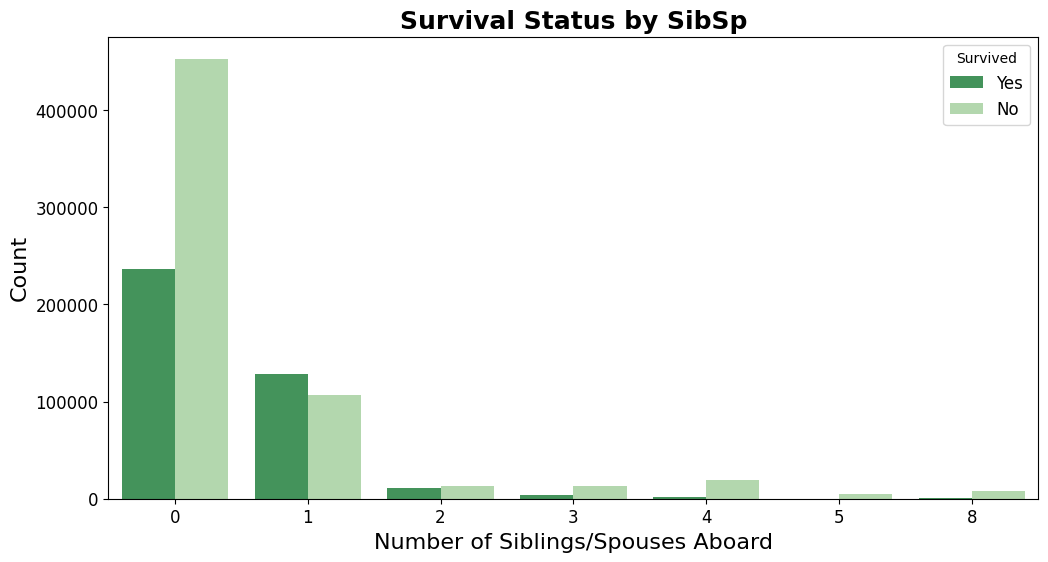

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='Greens_r')

# Add title and labels with appropriate font sizes
plt.title('Survival Status by SibSp', fontsize=18, fontweight='bold')
plt.xlabel('Number of Siblings/Spouses Aboard', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', fontsize=12)

plt.show()

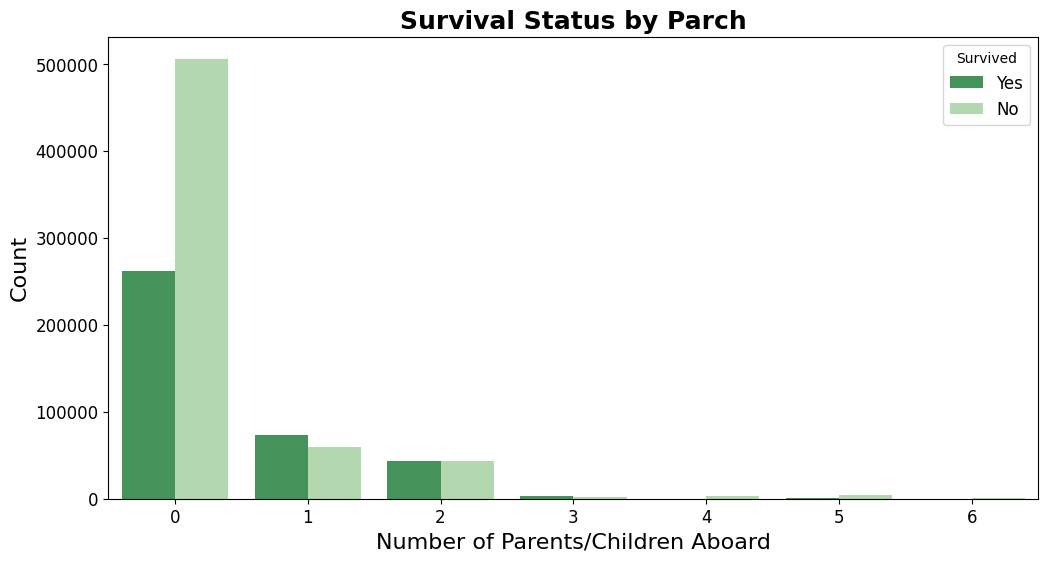

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Parch', hue='Survived', data=df, palette='Greens_r')

# Add title and labels with appropriate font sizes
plt.title('Survival Status by Parch', fontsize=18, fontweight='bold')
plt.xlabel('Number of Parents/Children Aboard', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', fontsize=12)

plt.show()

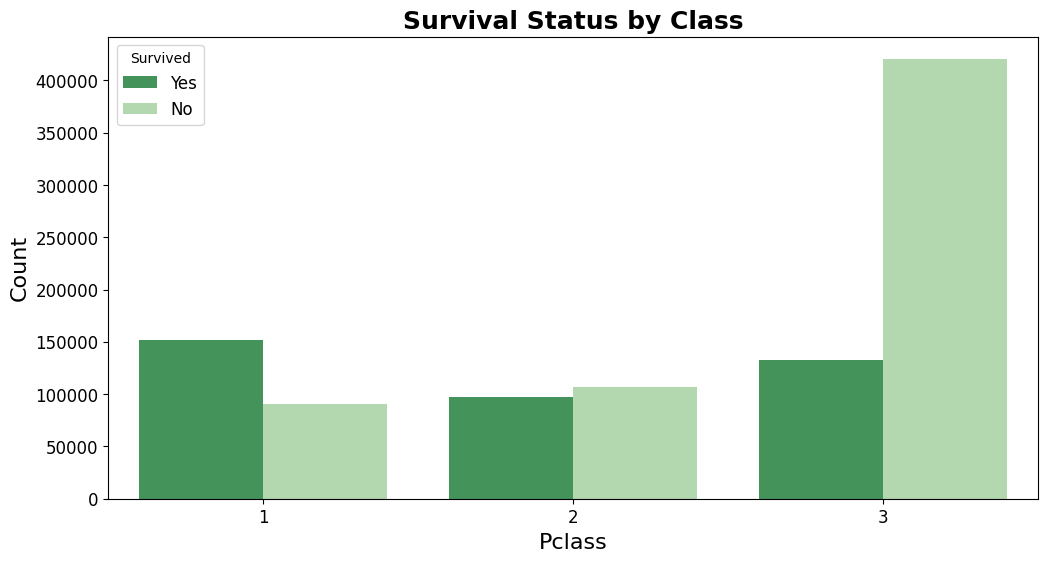

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Greens_r')

# Add title and labels with appropriate font sizes
plt.title('Survival Status by Class', fontsize=18, fontweight='bold')
plt.xlabel('Pclass', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Survived', fontsize=12)

plt.show()

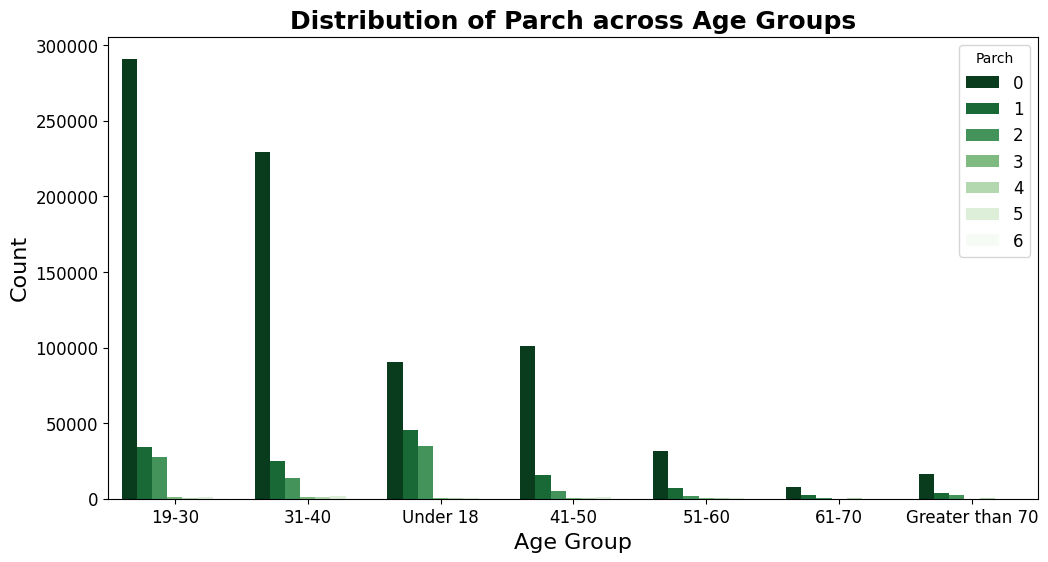

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='Parch', data=df, palette='Greens_r')

# Add title and labels with appropriate font sizes
plt.title('Distribution of Parch across Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Parch', fontsize=12)

plt.show()

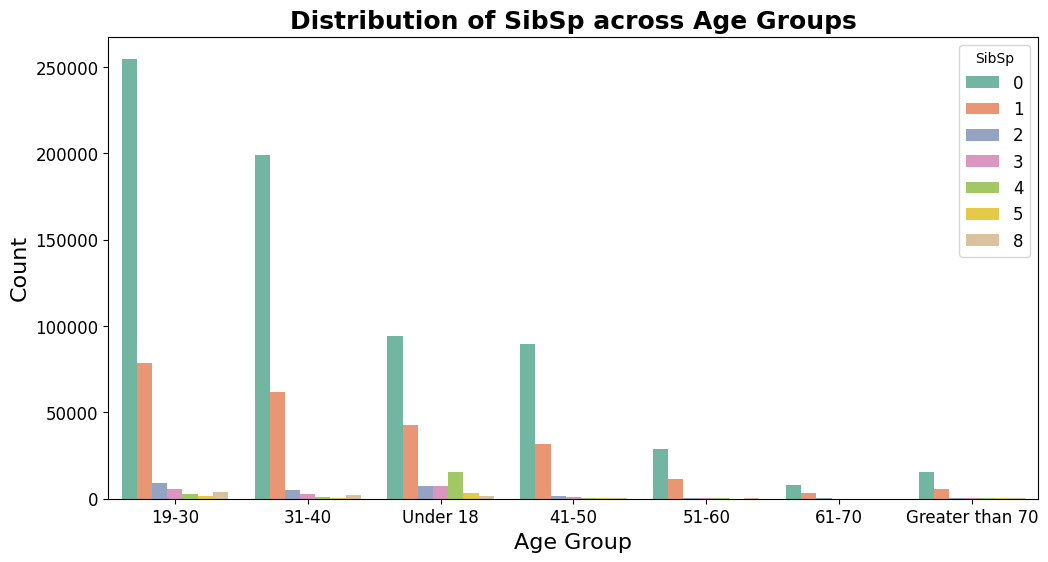

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='SibSp', data=df, palette='Set2')

# Add title and labels with appropriate font sizes
plt.title('Distribution of SibSp across Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='SibSp', fontsize=12)

plt.show()